In [ ]:
##! gdown --id 1xPOWo1DzcJLUMaKSFh6YSh1J2WEdAs23

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the CSV file
file_path1 = 'sftp://azizmohm@puhti.csc.fi/scratch/project_2000859/BDA2024/azizmohm/Project/US_Accidents_March23.csv'
df = pd.read_csv(file_path1)

print(df.head(2))


          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   

                        End_Time  Start_Lat  Start_Lng    End_Lat    End_Lng  \
0            2019-06-12 10:55:58  30.641211 -91.153481        NaN        NaN   
1  2022-12-04 01:56:53.000000000  38.990562 -77.399070  38.990037 -77.398282   

   Distance(mi)  ... Roundabout Station   Stop Traffic_Calming Traffic_Signal  \
0         0.000  ...      False   False  False           False           True   
1         0.056  ...      False   False  False           False          False   

  Turning_Loop Sunrise_Sunset Civil_Twilight Nautical_Twilight  \
0        False            Day            Day               Day   
1        False          Night          Night             Night   

  Astronomical_Twilight  
0                   Day  
1                 Night  

[2 rows x 46 columns]


In [ ]:
num_records = df.shape[0]
print(num_records)

500000


In [ ]:
df.count()

ID                       500000
Source                   500000
Severity                 500000
Start_Time               500000
End_Time                 500000
Start_Lat                500000
Start_Lng                500000
End_Lat                  279623
End_Lng                  279623
Distance(mi)             500000
Description              499999
Street                   499309
City                     499981
County                   500000
State                    500000
Zipcode                  499884
Country                  500000
Timezone                 499493
Airport_Code             498554
Weather_Timestamp        492326
Temperature(F)           489534
Wind_Chill(F)            370983
Humidity(%)              488870
Pressure(in)             491072
Visibility(mi)           488709
Wind_Direction           488803
Wind_Speed(mph)          463013
Precipitation(in)        357384
Weather_Condition        488899
Amenity                  500000
Bump                     500000
Crossing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import nltk
nltk.download('punkt')

# Drop 'ID' column as it is not relevant for modeling
df.drop(columns=['ID'], inplace=True)

# One-hot encode 'Source' column
#df = pd.get_dummies(df, columns=['Source'], drop_first=True)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd

# Convert 'Start_Time' and 'End_Time' columns to datetime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])




In [ ]:
# Separate date and time for 'Start_Time'
df['Start_Date'] = pd.to_datetime(df['Start_Time']).dt.date
df['Start_TimeOfDay'] = pd.to_datetime(df['Start_Time']).dt.time

# Separate date and time for 'End_Time'
df['End_Date'] = pd.to_datetime(df['End_Time']).dt.date
df['End_TimeOfDay'] = pd.to_datetime(df['End_Time']).dt.time

# Drop original 'Start_Time' and 'End_Time' columns
df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)


In [ ]:
# Separate date and time for 'Weather_Timestamp'
df['Weather_Date'] = pd.to_datetime(df['Weather_Timestamp']).dt.date
df['Weather_TimeOfDay'] = pd.to_datetime(df['Weather_Timestamp']).dt.time

# Drop original 'Weather_Timestamp' column
df.drop(['Weather_Timestamp'], axis=1, inplace=True)


In [ ]:
# Fill NaN or empty values in 'Start_Date' and 'End_Date' with 'Weather_Date'
df['Start_Date'].fillna(df['Weather_Date'], inplace=True)
df['End_Date'].fillna(df['Weather_Date'], inplace=True)

In [ ]:
import pandas as pd
from datetime import datetime

# Assuming df is your DataFrame and the 'Start_TimeOfDay' and 'End_TimeOfDay' columns are in datetime.time format

# Convert 'Start_TimeOfDay' and 'End_TimeOfDay' columns to datetime objects
df['Start_Time'] = pd.to_datetime(df['Start_TimeOfDay'].astype(str))
df['End_Time'] = pd.to_datetime(df['End_TimeOfDay'].astype(str))

# Calculate the time difference
df['Duration'] = df['End_Time'] - df['Start_Time']

# Print the DataFrame with the time difference
#print(df[['Start_TimeOfDay', 'End_TimeOfDay', 'Duration']])

# Drop original 'Start_Time' and 'End_Time' columns
df.drop(['Start_Time', 'End_Time'], axis=1, inplace=True)


       Start_TimeOfDay End_TimeOfDay          Duration
0             10:10:56      10:55:58   0 days 00:45:02
1             23:37:14      01:56:53 -1 days +02:19:39
2             13:13:00      15:22:45   0 days 02:09:45
3             17:43:04      19:43:23   0 days 02:00:19
4             01:46:00      04:13:09   0 days 02:27:09
...                ...           ...               ...
499995        07:30:00      07:50:30   0 days 00:20:30
499996        16:25:00      17:40:37   0 days 01:15:37
499997        19:28:29      21:33:44   0 days 02:05:15
499998        17:20:56      17:50:56   0 days 00:30:00
499999        23:23:13      00:49:48 -1 days +01:26:35

[500000 rows x 3 columns]


In [ ]:
# Convert miles to kilometers (1 mile = 1.60934 kilometers)
df['Distance(km)'] = df['Distance(mi)'] * 1.60934

# If you want to keep the original 'Distance(mi)' column, comment out the next line
df.drop(['Distance(mi)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
#print(df[['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(km)']])


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Example preprocessing function
def preprocess_text(text):
    if pd.isna(text):
        return []
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    # If 'accident' or 'incident' is in the text, keep them as separate tokens
    tokens = tokens + ['accident'] * text.count('accident') + ['incident'] * text.count('incident')
    return tokens


# Preprocess 'Description' column
df['Description_Processed'] = df['Description'].apply(preprocess_text)

# Train Word2Vec model
model = Word2Vec(df['Description_Processed'], vector_size=100, window=5, min_count=1, workers=4)

# Example: Get vector representation of a word
word_vector = model.wv['accident']

# Example: Find similar words
similar_words = model.wv.most_similar('accident')

# Example: Get vector representation of a description
def get_description_vector(description):
    tokens = preprocess_text(description)
    description_vector = [model.wv[token] for token in tokens if token in model.wv]
    return description_vector

# Apply the function to 'Description' column
df['Description_Vector'] = df['Description'].apply(get_description_vector)


In [ ]:
# Convert Fahrenheit to Celsius for 'Temperature(F)' column
df['Temperature(C)'] = ((df['Temperature(F)'] - 32) * 5 / 9).round(1)

# Convert Fahrenheit to Celsius for 'Wind_Chill(F)' column
df['Wind_Chill(C)'] = ((df['Wind_Chill(F)'] - 32) * 5 / 9).round(1)

# Drop the original Fahrenheit columns if desired
df.drop(['Temperature(F)', 'Wind_Chill(F)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
#print(df[['Temperature(C)', 'Wind_Chill(C)']])


        Temperature(C)  Wind_Chill(C)
0                 25.0           25.0
1                  7.2            6.1
2                 20.0           20.0
3                 -2.8           -9.4
4                  5.6            5.6
...                ...            ...
499995             4.4            0.0
499996            25.6           25.6
499997            11.1           11.1
499998            27.8           27.8
499999            10.0           10.0

[500000 rows x 2 columns]


In [ ]:
# Convert miles to kilometers for 'Visibility(mi)' column and format to two digits
df['Visibility(km)'] = (df['Visibility(mi)'] * 1.60934).apply(lambda x: f'{x:.2f}')

# Convert miles per hour to kilometers per hour for 'Wind_Speed(mph)' column and format to two digits
df['Wind_Speed(kph)'] = (df['Wind_Speed(mph)'] * 1.60934).apply(lambda x: f'{x:.2f}')

# Drop the original columns if desired
df.drop(['Visibility(mi)', 'Wind_Speed(mph)'], axis=1, inplace=True)

# Print the DataFrame to verify the changes
#print(df[['Humidity(%)', 'Pressure(in)', 'Visibility(km)', 'Wind_Speed(kph)']])



        Humidity(%)  Pressure(in) Visibility(km) Wind_Speed(kph)
0              62.0         29.92          16.09            8.05
1              48.0         29.91          16.09            8.05
2              73.0         29.79          16.09           20.92
3              86.0         28.49          16.09           24.14
4              34.0         29.77          16.09            0.00
...             ...           ...            ...             ...
499995         77.0         29.55          16.09           24.14
499996         87.0         29.94          16.09           20.92
499997         12.0         24.94          16.09           19.31
499998         38.0         28.70          16.09           22.53
499999         66.0         29.29          16.09            0.00

[500000 rows x 4 columns]


In [ ]:
boolean_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Convert boolean columns to 1 if True, 0 if False
for col in boolean_columns:
    df[col] = df[col].apply(lambda x: 1 if x else 0)

# Print the DataFrame to verify the changes
#print(df[boolean_columns])


        Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  Railway  \
0             0     0         0         0         0        0        0   
1             0     0         0         0         0        0        0   
2             0     0         0         0         0        0        0   
3             0     0         0         0         0        0        0   
4             0     0         0         0         0        0        0   
...         ...   ...       ...       ...       ...      ...      ...   
499995        0     0         0         0         0        0        0   
499996        0     0         0         0         0        0        0   
499997        0     0         1         1         0        0        0   
499998        0     0         0         0         0        0        0   
499999        0     0         0         0         0        0        0   

        Roundabout  Station  Stop  Traffic_Calming  Traffic_Signal  \
0                0        0     0                0   

In [ ]:
# Mapping for 'Day' and 'Night'
time_mapping = {'Day': 1, 'Night': 0}

# Apply mapping to all relevant columns
time_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in time_columns:
    df[col] = df[col].map(time_mapping)

# Print the DataFrame to verify the changes
#print(df[time_columns])


        Sunrise_Sunset  Civil_Twilight  Nautical_Twilight  \
0                  1.0             1.0                1.0   
1                  0.0             0.0                0.0   
2                  1.0             1.0                1.0   
3                  1.0             1.0                1.0   
4                  0.0             0.0                0.0   
...                ...             ...                ...   
499995             0.0             1.0                1.0   
499996             1.0             1.0                1.0   
499997             0.0             0.0                1.0   
499998             1.0             1.0                1.0   
499999             0.0             0.0                0.0   

        Astronomical_Twilight  
0                         1.0  
1                         0.0  
2                         1.0  
3                         1.0  
4                         0.0  
...                       ...  
499995                    1.0  
499996     

In [ ]:
pd.set_option('display.max_columns', None)
print(df.head(2))


    Source  Severity  Start_Lat  Start_Lng    End_Lat    End_Lng  \
0  Source2         2  30.641211 -91.153481        NaN        NaN   
1  Source1         2  38.990562 -77.399070  38.990037 -77.398282   

                                         Description            Street  \
0  Accident on LA-19 Baker-Zachary Hwy at Lower Z...        Highway 19   
1  Incident on FOREST RIDGE DR near PEPPERIDGE PL...   Forest Ridge Dr   

       City            County State     Zipcode Country    Timezone  \
0   Zachary  East Baton Rouge    LA  70791-4610      US  US/Central   
1  Sterling           Loudoun    VA  20164-2813      US  US/Eastern   

  Airport_Code  Humidity(%)  Pressure(in) Wind_Direction  Precipitation(in)  \
0         KBTR         62.0         29.92             NW                0.0   
1         KIAD         48.0         29.91              W                0.0   

  Weather_Condition  Amenity  Bump  Crossing  Give_Way  Junction  No_Exit  \
0              Fair        0     0         

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Clean column names to remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Select relevant features (X) and target variable (y)
X = df[['Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_imputed)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.79415


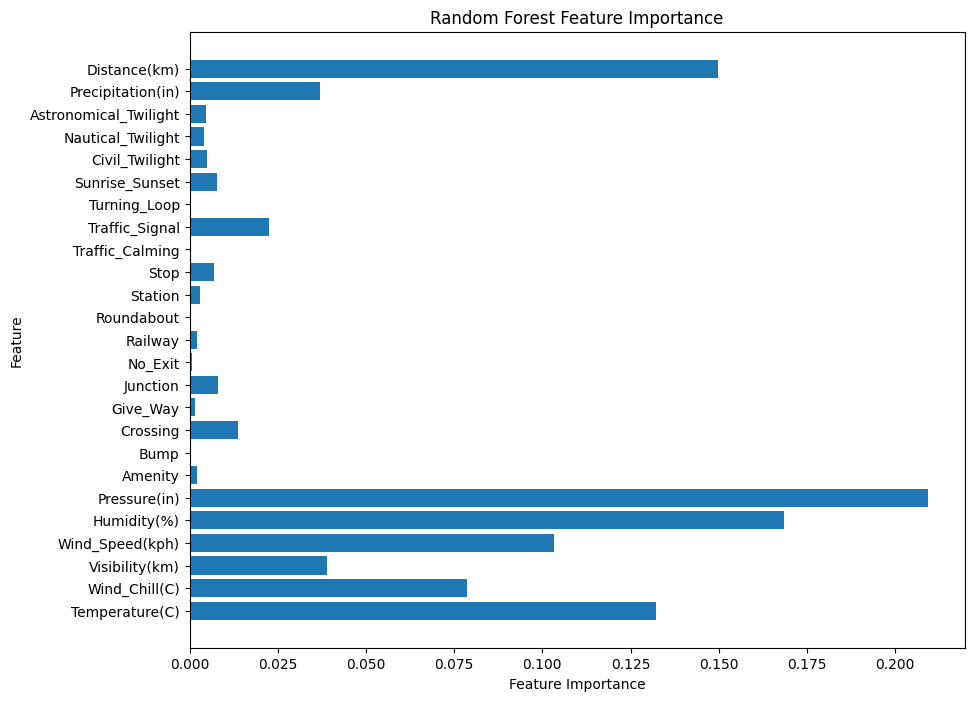

In [ ]:
# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Clean column names to remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Assuming Severity classes are [1, 2, 3, 4], map them to [0, 1, 2, 3]
df['Severity'] = df['Severity'] - 1

# Select relevant features (X) and target variable (y)
X = df[['Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Gradient Boosting Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train_imputed, y_train)

# Make predictions
xgb_pred = xgb_classifier.predict(X_test_imputed)

# Evaluate the model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

# Get feature importance
xgb_feature_importance = xgb_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})
print("XGBoost Feature Importance:")
print(feature_importance_df)



XGBoost Accuracy: 0.80292
XGBoost Feature Importance:
                  Feature  Importance
0          Temperature(C)    0.010478
1           Wind_Chill(C)    0.025501
2          Visibility(km)    0.008685
3         Wind_Speed(kph)    0.011796
4             Humidity(%)    0.009609
5            Pressure(in)    0.016373
6                 Amenity    0.026566
7                    Bump    0.005456
8                Crossing    0.086230
9                Give_Way    0.009648
10               Junction    0.026581
11                No_Exit    0.006265
12                Railway    0.025404
13             Roundabout    0.001789
14                Station    0.022261
15                   Stop    0.120974
16        Traffic_Calming    0.011663
17         Traffic_Signal    0.276450
18           Turning_Loop    0.000000
19         Sunrise_Sunset    0.009294
20         Civil_Twilight    0.012741
21      Nautical_Twilight    0.017918
22  Astronomical_Twilight    0.018879
23      Precipitation(in)    0.088

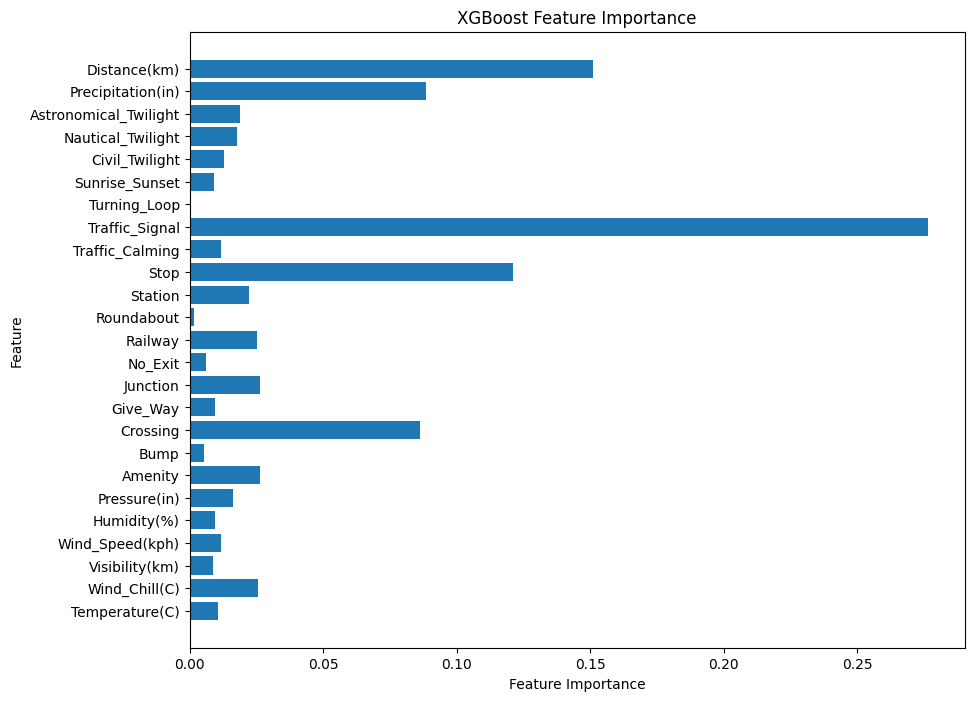

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
importances = xgb_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


Decision Tree Classifier Accuracy: 0.6910267768355963


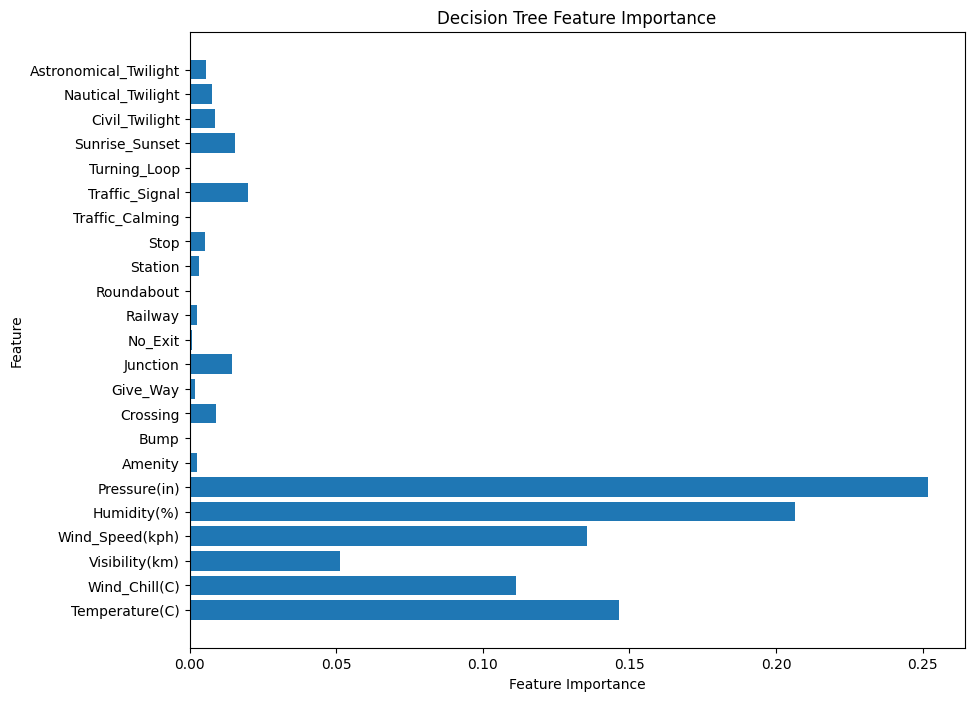

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Select relevant features (X) and target variable (y)
X = df[['Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_imputed, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test_imputed)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Classifier Accuracy:", accuracy_dt)

# Get feature importances
importances_dt = dt_classifier.feature_importances_
feature_names = X.columns

# Visualize feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importances_dt)), importances_dt, tick_label=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()


In [ ]:
pip install tpot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=49769ac314b5863ff32fed85596ef18fffbd117fbc0e262c8aba9736679704c6
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# Assuming Severity classes are [1, 2, 3, 4], map them to [0, 1, 2, 3]
# df['Severity'] = df['Severity'] - 1

# Select relevant features (X) and target variable (y)
X = df[['Temperature(C)', 'Wind_Chill(C)', 'Visibility(km)', 'Wind_Speed(kph)', 'Humidity(%)', 'Pressure(in)', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Precipitation(in)', 'Distance(km)']]
y = df['Severity']  # Assuming 'Severity' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42, n_jobs=-1)

# Fit TPOT to the training data
tpot.fit(X_train, y_train)

# Evaluate the best pipeline on the testing data
tpot_accuracy = tpot.score(X_test, y_test)
print("TPOT Accuracy:", tpot_accuracy)

# Export the best pipeline as a Python script
tpot.export('tpot_best_pipeline.py')


Imputing missing values in feature set


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7963925

Generation 2 - Current best internal CV score: 0.7964149999999999

Generation 3 - Current best internal CV score: 0.7964149999999999

Generation 4 - Current best internal CV score: 0.7964149999999999

Generation 5 - Current best internal CV score: 0.7967299999999999

Best pipeline: DecisionTreeClassifier(DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=6, min_samples_leaf=8, min_samples_split=11), criterion=gini, max_depth=7, min_samples_leaf=13, min_samples_split=4)
Imputing missing values in feature set
TPOT Accuracy: 0.79641


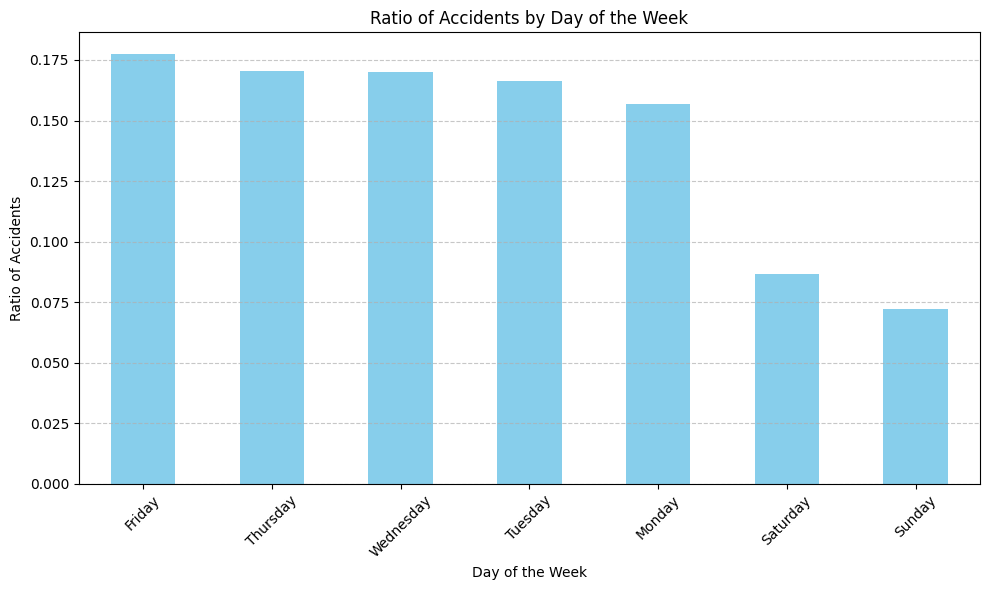

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already executed the following line:
# df['Start_Date'] = pd.to_datetime(df['Start_Time']).dt.date

# Extract day of the week
df['Start_Date'] = pd.to_datetime(df['Start_Date'])
df['Day_of_Week'] = df['Start_Date'].dt.day_name()

# Calculate the total number of accidents for each day of the week
accidents_by_day = df['Day_of_Week'].value_counts()

# Calculate the ratio of accidents for each day of the week
total_accidents = accidents_by_day.sum()
ratio_accidents = accidents_by_day / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


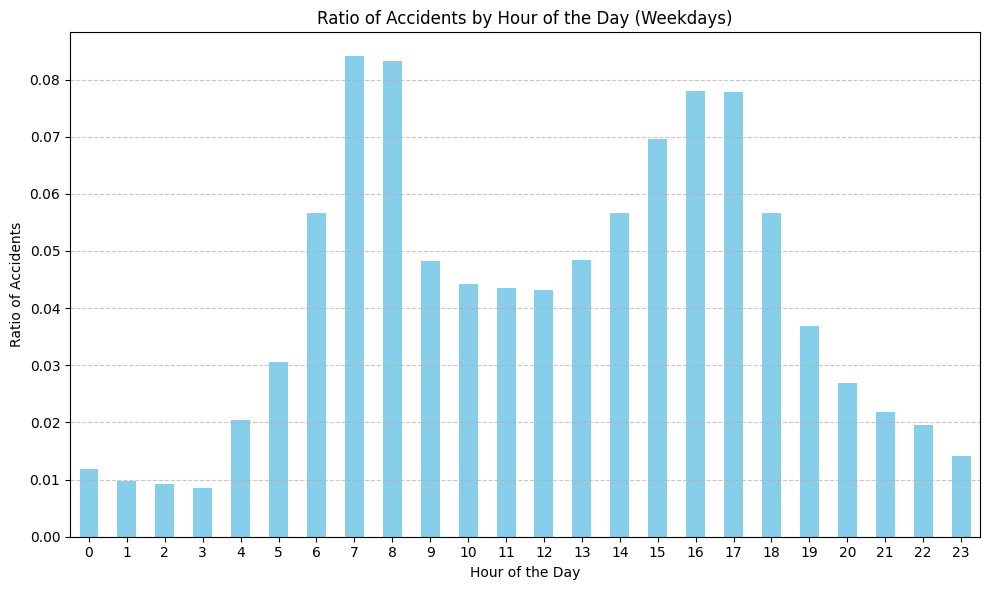

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already executed the following line:
# df['Start_TimeOfDay'] = pd.to_datetime(df['Start_Time']).dt.time

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['Day_of_Week'].isin(weekdays)]

# Calculate the total number of accidents for each hour of the day
accidents_by_hour = df_weekdays['Hour_of_Day'].value_counts().sort_index()

# Calculate the ratio of accidents for each hour of the day
total_accidents = accidents_by_hour.sum()
ratio_accidents = accidents_by_hour / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekdays)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



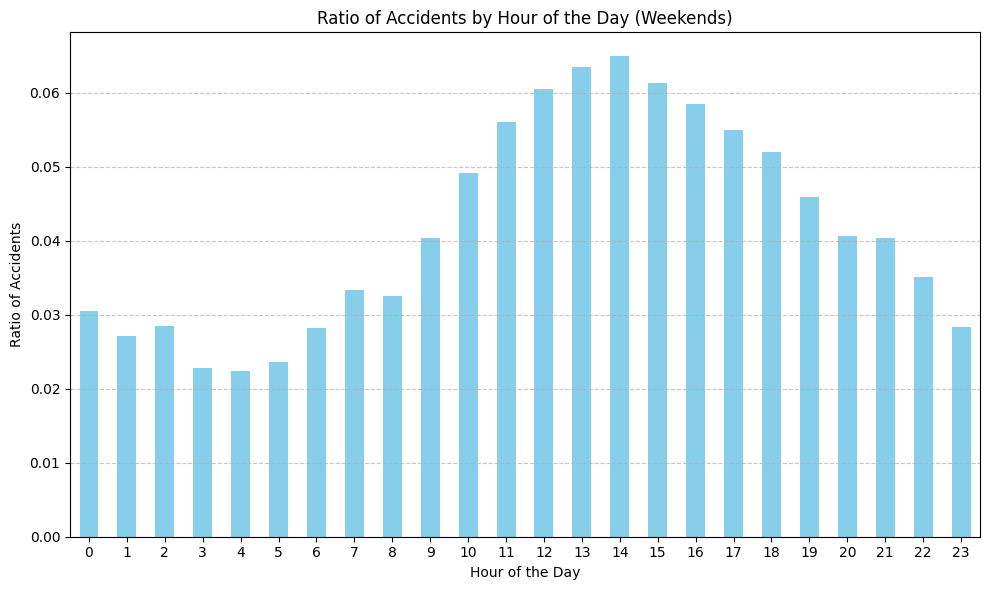

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already executed the following line:
# df['Start_TimeOfDay'] = pd.to_datetime(df['Start_Time']).dt.time

# Extract hour of the day and day of the week
df['Hour_of_Day'] = df['Start_TimeOfDay'].apply(lambda x: x.hour)
df['Day_of_Week'] = pd.to_datetime(df['Start_Date']).dt.day_name()

# Filter out weekends
weekends = ['Saturday', 'Sunday']
df_weekends = df[df['Day_of_Week'].isin(weekends)]

# Group by hour of the day and count accidents
hourly_accidents = df_weekends.groupby('Hour_of_Day').size()

# Calculate the total number of accidents on weekends
total_accidents_weekends = hourly_accidents.sum()

# Calculate the ratio of accidents for each hour of the day
ratio_accidents = hourly_accidents / total_accidents_weekends

# Plotting
plt.figure(figsize=(10, 6))
ratio_accidents.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Hour of the Day (Weekends)')
plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




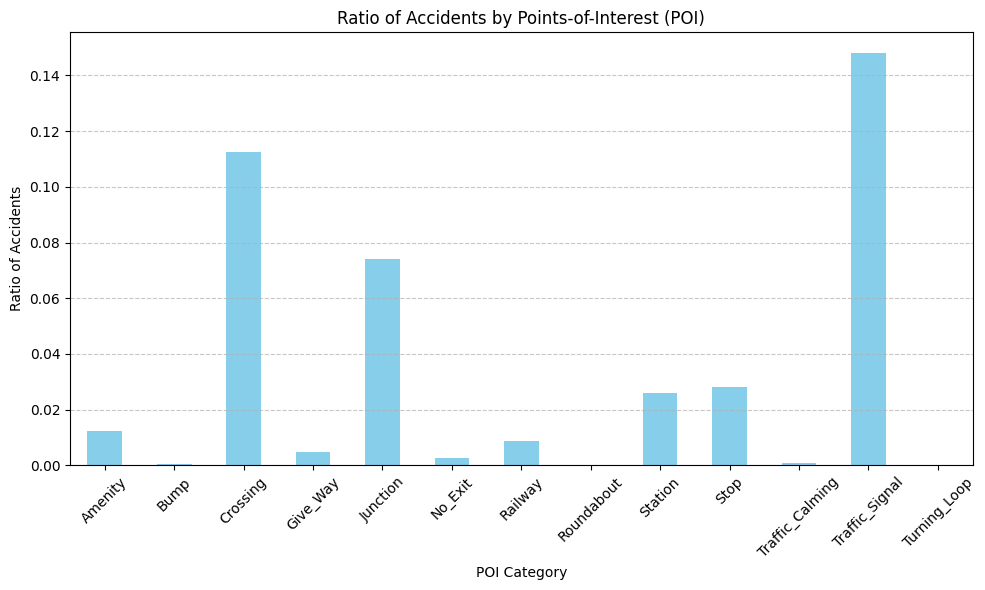

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame contains boolean columns indicating points-of-interest
poi_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

# Calculate total counts for each POI category
poi_counts = df[poi_columns].sum()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each POI category
poi_ratios = poi_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
poi_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Points-of-Interest (POI)')
plt.xlabel('POI Category')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


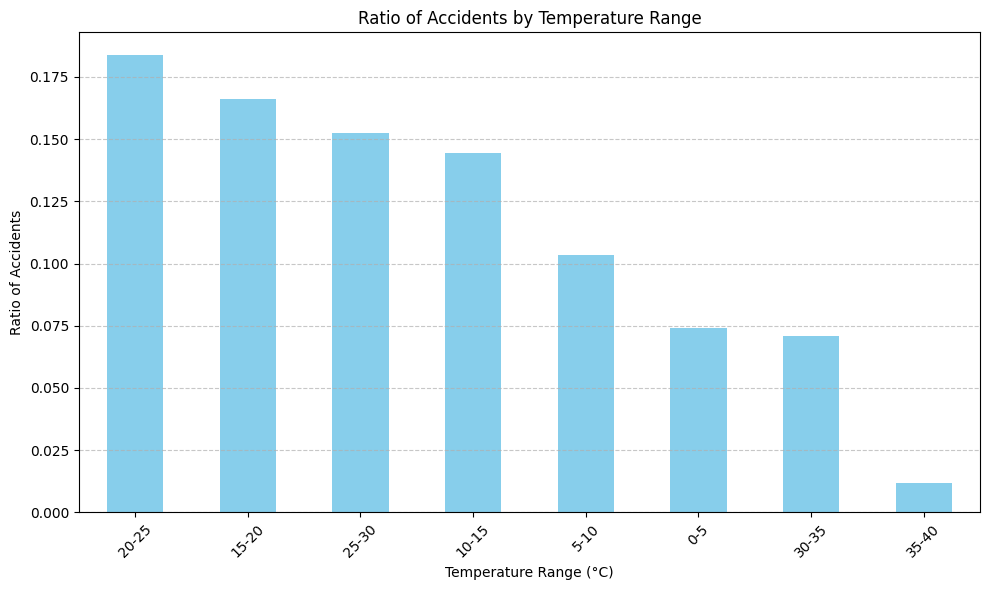

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have temperature data in a column named 'Temperature(C)'
# Assuming you have already cleaned the data and there are no missing values

# Define temperature ranges and labels
temperature_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
temperature_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40']

# Cut temperature into bins
df['Temperature_Range'] = pd.cut(df['Temperature(C)'], bins=temperature_bins, labels=temperature_labels, right=False)

# Calculate total counts for each temperature range
temperature_counts = df['Temperature_Range'].value_counts()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each temperature range
temperature_ratios = temperature_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
temperature_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Temperature Range')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



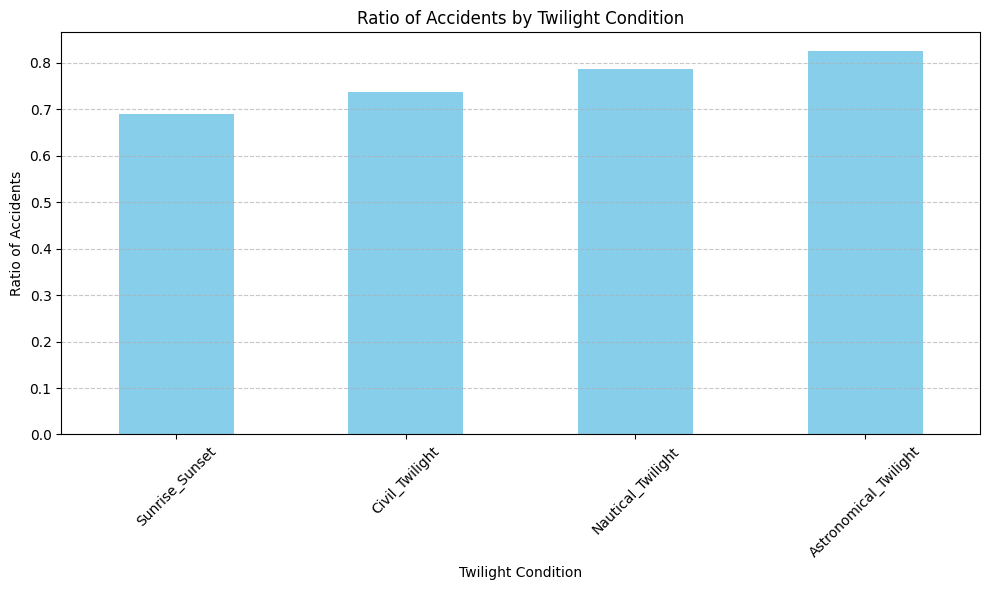

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total counts for each twilight condition
twilight_counts = df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].sum()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each twilight condition
twilight_ratios = twilight_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
twilight_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Twilight Condition')
plt.xlabel('Twilight Condition')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


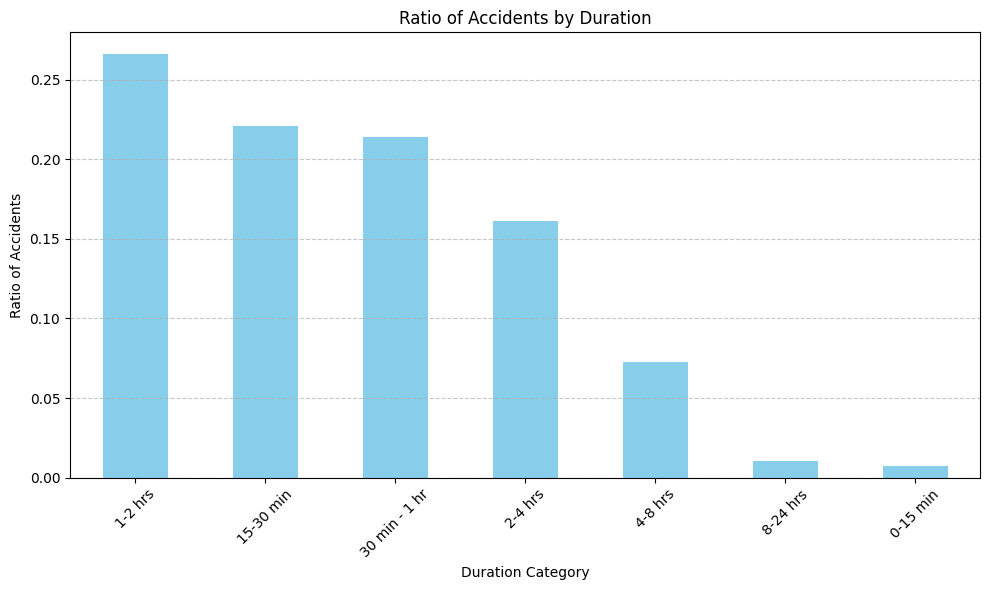

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Duration' column is in timedelta format
# If not, you may need to convert it to timedelta format

# Define duration categories
duration_bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=15), pd.Timedelta(minutes=30), pd.Timedelta(hours=1), pd.Timedelta(hours=2), pd.Timedelta(hours=4), pd.Timedelta(hours=8), pd.Timedelta(hours=24)]
duration_labels = ['0-15 min', '15-30 min', '30 min - 1 hr', '1-2 hrs', '2-4 hrs', '4-8 hrs', '8-24 hrs']

# Cut duration into bins
df['Duration_Category'] = pd.cut(df['Duration'], bins=duration_bins, labels=duration_labels, right=False)

# Calculate total counts for each duration category
duration_counts = df['Duration_Category'].value_counts()

# Calculate the total number of accidents
total_accidents = len(df)

# Calculate the ratio of accidents for each duration category
duration_ratios = duration_counts / total_accidents

# Plotting
plt.figure(figsize=(10, 6))
duration_ratios.plot(kind='bar', color='skyblue')
plt.title('Ratio of Accidents by Duration')
plt.xlabel('Duration Category')
plt.ylabel('Ratio of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
